# Clustering Model of UNSUPERVISED MACHINE LEARNING

Using the Online Retail Dataset of a UK-Based Company , I am Building a Clustering Model which will segregate customers according to their given attributes.

#### After Building the model , we can easily find the answers of following questions- 
* Who are our best customers?
* Who has the potential to be converted in more profitable customers?
* Which customers we must retain?
* Which group of customers is most likely to respond to our current campaign?

#### Let's Start!

##### Importing all the necessary Libraries of Python

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline

##### Let's check the Data

In [221]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [92]:
df.shape

(541909, 8)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Data Dictionary- 
|S.No| Variable Name | Meaning |
|---| --- | --- | 
|1| InvoiceNo | A 6-Digit Code assigned to each Transaction. If this starts with an Aplhabet 'C' , this means the transaction has been cancelled. |
|2| StockCode   | A 5-Digit Code assigned to each Distinct Product. |
|3| Description | Name of the Product Purchasesd. |
|4| Quantity    | Number of Products purchased per Transaction. |
|5| InvoiceDate | Date and Time at which the Transaction has been done. |
|6| UnitPrice    | Price of a Specific Product. |
|7| CustomerID | A 5-Digit code assigned to each customer. It is unique for each customer. |
|8| Country | Country at which the customer resides or the Transaction Done. |

### There are total 5,41,909 Rows and 8 columns in our data set
 * There are some missing Values in 'CustomerID' and 'Description' column as the row number is less in them.

# Data Cleaning

In [94]:
print("Total Number of Transactions:", df['InvoiceNo'].nunique())
print("Total Number of Products purchased:",df['StockCode'].nunique())
print("Total Number of Customers:",df['CustomerID'].nunique())
print("Total Number of Countries:",df['Country'].nunique())

Total Number of Transactions: 25900
Total Number of Products purchased: 4070
Total Number of Customers: 4372
Total Number of Countries: 38


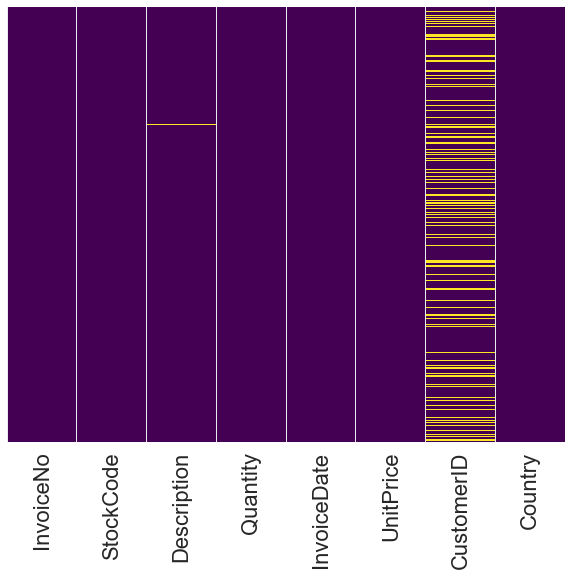

In [95]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [96]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### We will be dealing with null values only for the CustomerID column , as the null values of 'Description' column hardly matters.

#### So , there are total 1,35,080 rows with missing values of CustomerID column

In [97]:
print("Percentage of CustomerID missing: ",round(df['CustomerID'].isnull().sum()*100/len(df),2),"%")

Percentage of CustomerID missing:  24.93 %


#### Nearly around 25% of the Total CustomerIDs are missing

Let's create a temporary variable which will have 1 if the CustomerID is missing and 0 if CustomerID is not missing.

In [98]:
df['CustomerID_is_null'] = [1 if i == True else 0 for i in df.CustomerID.isnull()]

In [99]:
df1 = df[df['CustomerID_is_null'] == 1]
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1


##### Some Valueable Info about the df1

In [100]:
print("Total Number of Orders in df1:",df['InvoiceNo'].nunique())
print("Total Number of products Ordered in df1",df1['StockCode'].count())
print("Average Number of products per Order in df1",round(df1['StockCode'].count()/df1['InvoiceNo'].nunique(),2))
print("Average Number of products per in df",round(df['StockCode'].count()/df['InvoiceNo'].nunique(),2))

Total Number of Orders in df1: 25900
Total Number of products Ordered in df1 135080
Average Number of products per Order in df1 36.41
Average Number of products per in df 20.92


* The number of rows with missing values of 'CustomerID' is quite large. It will be affect our model's performance if we will drop them.
* The best solution to fill the missing values of CustomerID is that we can create a new Column in the our Original DataFrame 'New_IDs' and fill the 'InvoiceNo' as the New_IDs for the missing rows and the original ID for the remanining ones.

In [101]:
df['New_IDs']=df['CustomerID']
df.loc[df['CustomerID_is_null']==1,['New_IDs']]=df['InvoiceNo']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,New_IDs
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           541909 non-null  object        
 1   StockCode           541909 non-null  object        
 2   Description         540455 non-null  object        
 3   Quantity            541909 non-null  int64         
 4   InvoiceDate         541909 non-null  datetime64[ns]
 5   UnitPrice           541909 non-null  float64       
 6   CustomerID          406829 non-null  float64       
 7   Country             541909 non-null  object        
 8   CustomerID_is_null  541909 non-null  int64         
 9   New_IDs             541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 41.3+ MB


It can be observed from above , similar to other columns , New_IDs have total 5,41,909 rows in it and this column will be used in place of CustomerID column

In [102]:
df['New_IDs'] = df['New_IDs'].astype(str).str.replace('\D+', '')
df['New_IDs']=pd.to_numeric(df['New_IDs'])

In [86]:
print("Number of Orders in df1:",df1['InvoiceNo'].nunique())
print("Number of Customers in df:",df['CustomerID'].nunique())
print("Number of Orders in df1 + Number of customers in df:",df1['InvoiceNo'].nunique()+df['CustomerID'].nunique())
print("Number of New_IDs:",df['New_IDs'].nunique())

Number of Orders in df1: 3710
Number of Customers in df: 4372
Number of Orders in df1 + Number of customers in df: 8082
Number of New_IDs: 8082


##### Since both values equal 8082, we know all the different orders that didn't have a customer ID got assigned unique New_IDs.



There's no need of two columns - ['CustomerID_is_null','CustomerID'] ->So , let's just kick them off!

In [103]:
df.drop(['CustomerID_is_null','CustomerID'],axis=1,inplace=True)

In [104]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,New_IDs
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,178500
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,178500
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,178500
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,178500
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,178500


In [105]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
New_IDs           0
dtype: int64

# Exploratory Data Analysis

Our Data is clean now , so let's have a closer look at Unit Price and Quantity

In [38]:
df.describe()

,Quantity,UnitPrice,New_IDs
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,253869.471330
std,218.081158,96.759853,176036.804611
min,-80995.000000,-11062.060000,123460.000000
25%,1.000000,1.250000,143670.000000
50%,3.000000,2.080000,162490.000000
75%,10.000000,4.130000,182830.000000
max,80995.000000,38970.000000,581498.000000


### Wait! 
#### The min value in UnitPrice and Quantity is negative , this means the company is giving some items for free? Or they might be paying the customers in order to take their orders?

Well , that's not the case , the negative values might be simply referring to Cancelled Transactions , so let's check this out
# Negative Values

In [106]:
cancelled_df=df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,New_IDs
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom,145270
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom,153110
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom,175480
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,175480
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,175480


In [40]:
cancelled_df[cancelled_df['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,New_IDs


As all the Rows in the Quantity column of the cancelled orders have negative values , this confirms that negative values indicates the Cancelled Transactions

In [107]:
print("Total Number of Cancelled Orders:",len(cancelled_df))
print("Percentage of Cancelled Orders:",round(cancelled_df['StockCode'].count()*100/df['InvoiceNo'].nunique(),2),"%")

Total Number of Cancelled Orders: 9288
Percentage of Cancelled Orders: 35.86 %


##### A large number of Orders was cancelled. Some improvements is surely needed in the company
But for now , let's remove the rows with negative values

In [115]:
df = df[df['Quantity']>0]

In [118]:
df.shape

(531285, 9)

# Exploring Orders

In [119]:
gp_customers = pd.DataFrame(df.groupby('New_IDs')['InvoiceNo'].nunique())
gp_customers.columns=["No. of Orders per customer"]
gp_customers.head()

,No. of Orders per customer
New_IDs,
123460,1
123470,7
123480,4
123490,1
123500,1


In [120]:
gp_customers.describe()

,No. of Orders per customer
count,6531.000000
mean,3.173787
std,6.467705
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,210.000000


On an average , each customer has ordered for atleast 3 Times

In [121]:
gp_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
gp_invoice.columns=["No. of Items per order"]
gp_invoice.head()

,No. of Items per order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [122]:
gp_invoice.describe()

,No. of Items per order
count,20728.000000
mean,25.123022
std,46.345268
min,1.000000
25%,5.000000
50%,15.000000
75%,28.000000
max,1110.000000


On an average , each order contains 25 unique products

In [123]:
gp_id = pd.DataFrame(df.groupby('New_IDs')['StockCode'].nunique())
gp_id.columns=["No. of Items per customer"]
gp_id.head()

,No. of Items per customer
New_IDs,
123460,1
123470,103
123480,22
123490,73
123500,17


In [124]:
gp_id.describe()

,No. of Items per customer
count,6531.000000
mean,61.196907
std,97.856279
min,1.000000
25%,7.000000
50%,28.000000
75%,73.000000
max,1787.000000


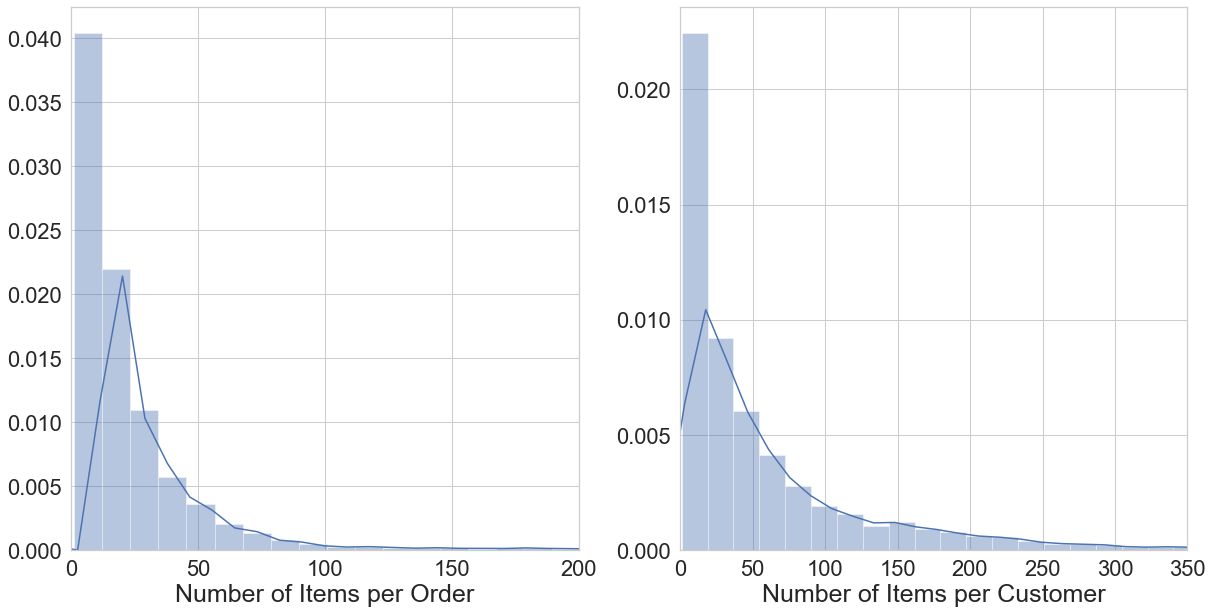

In [125]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(gp_invoice['No. of Items per order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(gp_id['No. of Items per customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()


### We have a Skewed Distribution for both the plots
Average number of Items per order: 25 & Average Number of Items per customer: 61

# Customers By Country

Let's create a new column of Total_Cost for each Transaction

In [126]:
df['Total_Cost']= df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,New_IDs,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,178500,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,178500,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,178500,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,178500,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,178500,20.34


In [127]:
gp_country = pd.DataFrame(df.groupby('Country')['New_IDs'].nunique())
gp_country.columns = ['No of Customers per country']
gp_country.head()

,No of Customers per country
Country,
Australia,9
Austria,11
Bahrain,3
Belgium,25
Brazil,1


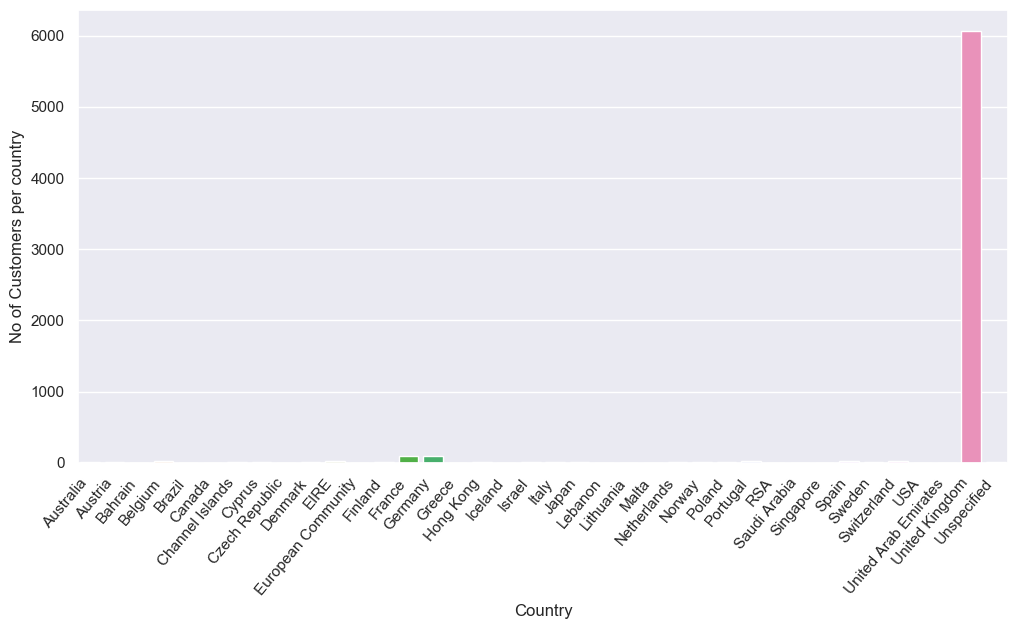

In [129]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=gp_country.index, y=gp_country['No of Customers per country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

##### As we can see that maximum number of orders are from UK only and it should be as the company is UK Based only

In [130]:
df.groupby('Country').sum().sort_values(by='Total_Cost', ascending=False)

,Quantity,UnitPrice,New_IDs,Total_Cost
Country,,,,
United Kingdom,4733819,1.845444e+06,128735169301,9.003098e+06
Netherlands,200937,6.247730e+03,340789530,2.854463e+05
EIRE,147447,3.848995e+04,1433423895,2.834540e+05
Germany,119263,3.353214e+04,1143723040,2.288671e+05
France,112104,3.699279e+04,1095284048,2.097151e+05
Australia,84209,3.612500e+03,147585280,1.385213e+05
Spain,27951,9.504340e+03,320802750,6.157711e+04
Switzerland,30630,6.634360e+03,304230060,5.708990e+04
Belgium,23237,7.372850e+03,252467010,4.119634e+04


# RFM  Analysis (Recency-Frequency-Monetary)

It is a customer segmentation technique which uses past purchase <b>Behaviour</b> to divide the customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

* <b>RECENCY (R)</b>: Days since last purchase
* <b>FREQUENCY (F)</b>: Total number of purchases
* <b>MONETARY VALUE (M)</b>: Total money this customer spent.

We will create those 3 customer attributes for each customer.

## a) Recency -

To calculate recency , we will choose a date as a point of reference and from that reference we will evaluate <b>Number of Days since last purchase</b> for the customers

In [138]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [142]:
reference_date = dt.date(2011,12,9)

So this is the most recent date and our reference date as well.

In [133]:
df['Date'] = df['InvoiceDate'].dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,New_IDs,Total_Cost,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,178500,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,178500,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,178500,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,178500,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,178500,20.34,2010-12-01


In [157]:
df_rec = df.groupby(by='New_IDs',as_index=False)['Date'].max()
df_rec.columns = ['Customer_IDs','Recent_Date']
df_rec.head()

,Customer_IDs,Recent_Date
0,123460,2011-01-18
1,123470,2011-12-07
2,123480,2011-09-25
3,123490,2011-11-21
4,123500,2011-02-02


In [158]:
df_rec['Recency'] = df_rec['Recent_Date'].apply(lambda x: (reference_date-x).days)

In [159]:
df_rec.drop('Recent_Date' ,axis=1, inplace=True)

In [160]:
df_rec.head()

,Customer_IDs,Recency
0,123460,325
1,123470,2
2,123480,75
3,123490,18
4,123500,310


Now we have Recency attribute created for each customer

# b) Frequency -

Frequency helps us to know <b>how many times a customer has purchased</b> from the company

In [167]:
df_frq =df.groupby(by=['New_IDs'],as_index=False)['InvoiceNo'].count()
df_frq.columns = ['Customer_IDs' , 'Frequency']

In [168]:
df_frq.head()

,Customer_IDs,Frequency
0,123460,1
1,123470,182
2,123480,31
3,123490,73
4,123500,17


Now we Frequency attribute for each customer

# c) Monetary -

Monetary attribute answers the question: <b>How much money did the customer spent over time?</b>

In [170]:
df_mon = df.groupby(by=['New_IDs'],as_index=False)['Total_Cost'].sum()
df_mon.columns = ['Customer_IDs','Monetary']
df_mon.head()

,Customer_IDs,Monetary
0,123460,77183.60
1,123470,4310.00
2,123480,1797.24
3,123490,1757.55
4,123500,334.40


Now we Monetary attribute for each customer

# RFM Table

In [174]:
df_rfm = df_rec.merge(df_frq,on='Customer_IDs')
df_rfm = df_rfm.merge(df_mon,on='Customer_IDs')
df_rfm.head()

,Customer_IDs,Recency,Frequency,Monetary
0,123460,325,1,77183.60
1,123470,2,182,4310.00
2,123480,75,31,1797.24
3,123490,18,73,1757.55
4,123500,310,17,334.40


In [184]:
df_rfm.describe()

,Customer_IDs,Recency,Frequency,Monetary
count,6531.000000,6531.000000,6531.000000,6531.000000
mean,288571.637575,122.733272,81.348186,1629.851542
std,191413.293719,112.678142,199.354632,7467.716324
min,123460.000000,0.000000,1.000000,-11062.060000
25%,145615.000000,24.000000,7.000000,130.245000
50%,167940.000000,78.000000,31.000000,501.120000
75%,546659.500000,212.000000,90.000000,1456.875000
max,581498.000000,373.000000,7847.000000,280206.020000


# Visualizing relation between R, F and M

In [189]:
rfm_r_log = np.log(df_rfm['Recency']+0.1) #log(0) is undefined
rfm_f_log = np.log(df_rfm['Frequency'])
rfm_m_log = np.log(df_rfm['Monetary']+0.1)

D:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [206]:
log_data = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})
log_data.head()

,Monetary,Recency,Frequency
0,11.253944,5.784133,0.000000
1,8.368716,0.741937,5.204007
2,7.494063,4.318821,3.433987
3,7.471733,2.895912,4.290459
4,5.812637,5.736895,2.833213


In [212]:
log_data.isnull().sum()

Monetary     0
Recency      0
Frequency    0
dtype: int64

In [211]:
log_data=log_data.dropna()

Text(0.5, 0, 'MonetaryValue')

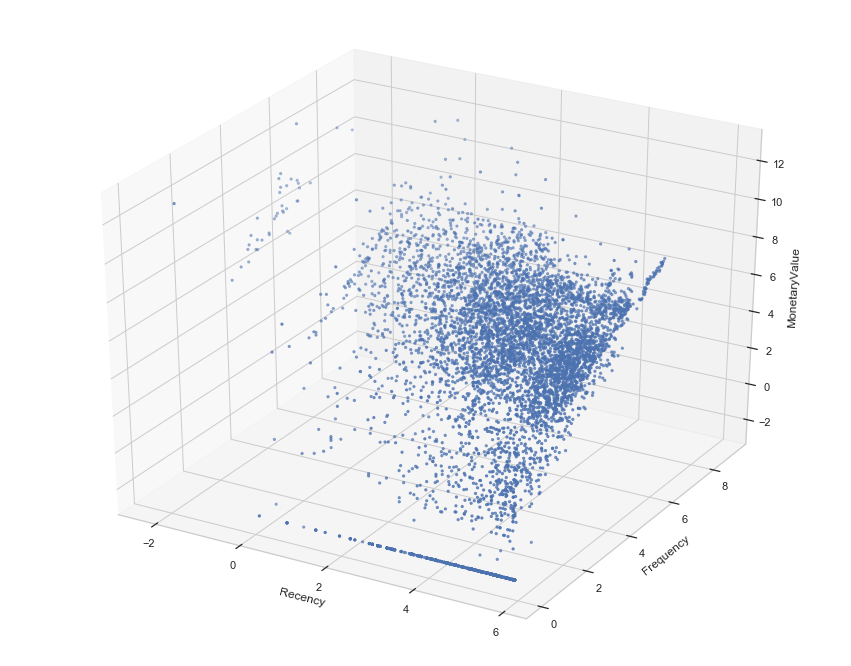

In [207]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

xs =log_data.Recency
ys = log_data.Frequency
zs = log_data.Monetary
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

* Customers who recently bought items, are also the ones who buy more freqently and place high value orders
* Customers who transacted long time ago, also place lower valued orders
* Customers who buy occasionally, do not tend to buy expensive items

# Normalization

In [213]:
X = log_data[["Recency", "Frequency", "Monetary"]].to_numpy()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Customer Segmentation - Using K-Means Clustering

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

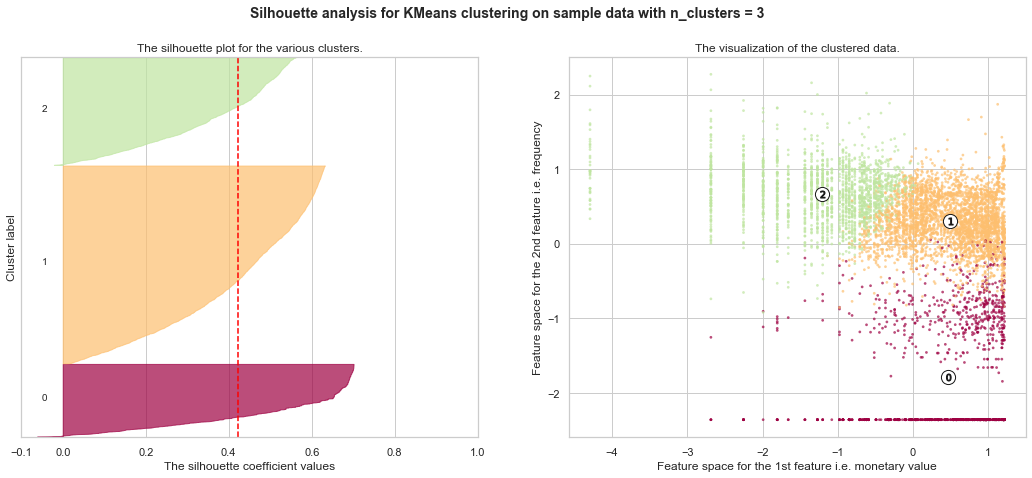

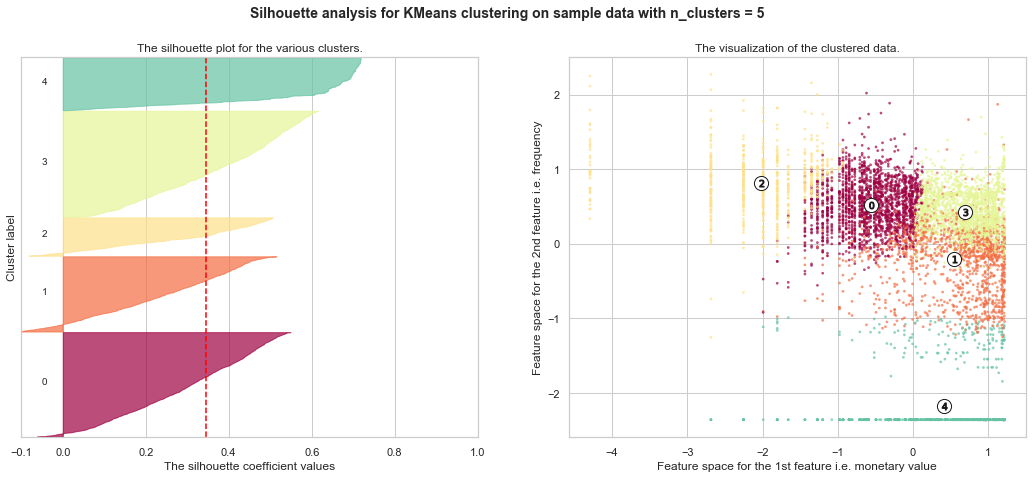

In [219]:
X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    #Train a K-means clustering model with 3/ 5 clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    
    #classify cluster labels based on training data
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

# Cluster Analysis

In [220]:
for i in range(3,6,2):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=["log_Recency", "log_Frequency", "log_MonetaryValue"]))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 3 number of clusters
   log_Recency  log_Frequency  log_MonetaryValue
0   120.909591       1.215401           0.619727
1   125.608966      30.063264         501.503811
2     9.931343      99.248860        1642.213160
Silhouette score for cluster 3 is 0.42308402645110554

for 5 number of clusters
   log_Recency  log_Frequency  log_MonetaryValue
0    26.272185      65.488541        1020.967727
1   137.742801       5.220222          98.878686
2     2.953809     146.465403        2641.314639
3   170.891197      54.541480         766.382795
4   111.988102       1.020154           0.176677
Silhouette score for cluster 5 is 0.344811167278143



# Observations and Inferences

## 1. From Three Clusters (Segments)-
 ###  a) High Value Customers - 
 <b><i>'Cluster 2'</i></b> is the high value customer segment for the online retails store as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently.
 ### b) Medium Value Customers - 
 <b><i>'Cluster 1'</i></b> appears to be the medium valued customer segment. These customers place an order of a considerable amount, though not as much as high valued customers, but still quite higher than low valued customers. Also, their orders are relatively more frequent than the lowest value segment.
 ### c) Low Value Customers - 
 It is quite evident that <b><i>'Cluster 0'</i></b> has customers who rarely shop and when they order, their orders are pretty low valued. Apart from the numbers, the visualization of clusters in Silhoutte Analysis show that all three customer segments are quite distinct with very less overlapp between them. 

## 2. From Five Clusters (Segments)-
### a) Overall high valued customers:
<b><i>'Cluster 2'</i></b> is the typical high value customer who has shopped recently and shops regularly for high value orders.
### b) High monetary value but less frequent:
<b><i>'Cluster 0'</i></b> represents a peculiar customer segment who place quite a high valued order but do not do so frequently or have not done much recently. But, these customers do hold a lot of promise if targeted to improve sales.
### c) Medium value - low frequency - recent customers:
The customers from <b><i>'Cluster 3'</i></b> have recently placed medium valued orders but do not do so frequently.
### d) Medium value - low frequency - older customers:
The customers from <b><i>'Cluster 1'</i></b> happen to place medium valued orders quite a long time ago and they do not do so frequently.
### e) Low valued customers:
<b><i>'Cluster 4'</i></b> is the segment of customers who have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values.

### Conclusion
The customer segments thus deduced can be very useful in targeted marketing, scouting for new customers and ultimately revenue growth. After knowing the types of customers, it depends upon the retailer policy whether to chase the high value customers and offer them better service and discounts or try and encourage low/ medium value customers to shop more freqently or of higher monetary values.

##### Developed By - Maninder Singh Bakshi